# **UrbanSound8K 🎵**

### EDA, FEATURE ENGINEERING & SELECTION

In [1]:
# import libraries
import os
import glob
import utils
import config
import random
import numpy 
import pickle as pkl
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from playsound import playsound
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
#import dataset
pwd = os.getcwd()
data = pd.read_csv(os.path.join(pwd, config.CSV_FILE_PATH))
df = data.copy()
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


The dataset contains the meta-data about the audio files. which include the audio file names, the unique classes it belongs to, the audio ID from its original extracted [source](www.freesound.org), The slice time (start and end) from the original audio file recording, as well as the folder where the audio resides.   

In [3]:
# unique classes
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

The list above shows the unique classes of the audio files contained in the dataset

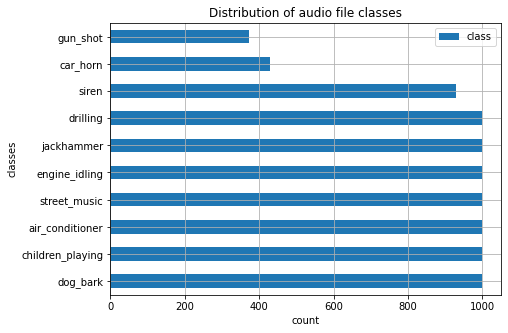

In [4]:
# check for imbalance in distibution audio classes
plt.figure(figsize=(7,5))
df['class'].value_counts().plot(kind='barh')
plt.grid(True)
plt.legend()
plt.title('Distribution of audio file classes')
plt.xlabel('count')
plt.ylabel('classes')
plt.show()

the distribution of the unique audio classes seem to be quite alright except the `gun_shot ` and `car_horn ` class which has less samples compared to the rest of the classes

In [5]:
# record length of all the 'audio files
df[['start', 'end']].head(5)

,start,end
0,0.0,0.317551
1,58.5,62.500000
2,60.5,64.500000
3,63.0,67.000000
4,68.5,72.500000


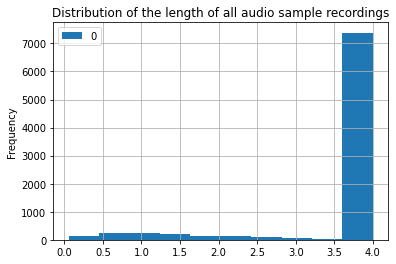

The average length range of each audio recording time present in the dataset is 3.6 secs to 4.0 secs


In [6]:
pd.DataFrame(df['end'] - df['start']).plot(kind='hist')
plt.grid(True)
plt.legend()
plt.title('Distribution of the length of all audio sample recordings')
plt.show()

print(f'The average length range of each audio recording time present in the dataset is {np.round(np.mean(df["end"] - df["start"]), 1)} secs to 4.0 secs')

In [7]:
# unique classes 
audio_classes = [ 'air_conditioner', 'car_horn', 
'children_playing', 'dog_bark', 'drilling', 
'engine_idling', 'gun_shot', 'jackhammer', 
'siren', 'street_music']

In [8]:
# audio file save format: format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav  

52740-3-0-2.wav 3


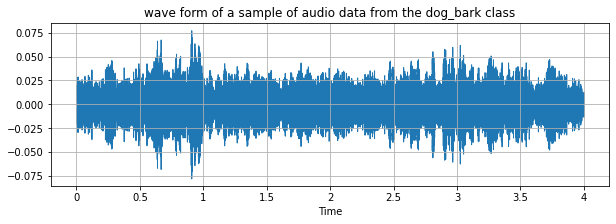

Audio data descriptive statistics
sample rate: 22050
min-value: -0.06659513711929321
max-value: 0.07767105102539062
std: 0.01477248128503561
mean: 0.00300950207747519
median: 0.0029018810018897057
skew: 0.10045249135362483
kurtosis: 0.5163944328263077

 

Statictics for MFCC extract
min-value: -328.8060302734375
max-value: 120.38201904296875
std: 56.04046630859375
mean: -3.5291075706481934
median: 2.531064033508301
skew: -4.598196410093292
kurtosis: 25.990642543923855
50629-4-1-11.wav 4


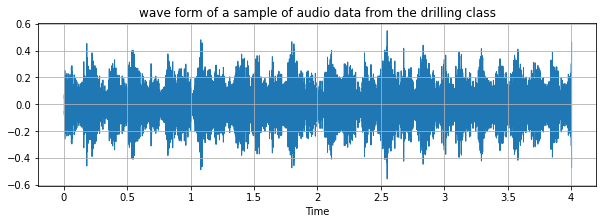

Audio data descriptive statistics
sample rate: 22050
min-value: -0.5521805286407471
max-value: 0.4841082692146301
std: 0.1052374467253685
mean: -4.46458398073446e-05
median: -0.001148740528151393
skew: 0.057590094785120824
kurtosis: 0.44881907951216693

 

Statictics for MFCC extract
min-value: -145.83236694335938
max-value: 114.44503784179688
std: 32.3497200012207
mean: 0.012967395596206188
median: -1.7541879415512085
skew: -1.052111239397843
kurtosis: 11.489291181088122
159744-8-0-11.wav 8


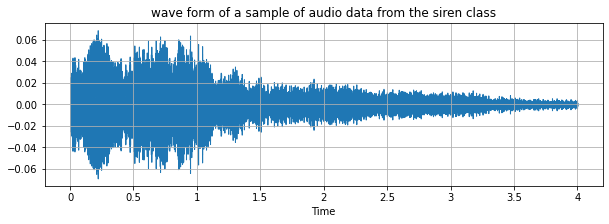

Audio data descriptive statistics
sample rate: 22050
min-value: -0.0687982514500618
max-value: 0.06462329626083374
std: 0.012188475579023361
mean: 5.407894718700845e-07
median: -8.560078276786953e-05
skew: -0.04026592191931722
kurtosis: 3.655250570888077

 

Statictics for MFCC extract
min-value: -467.6591491699219
max-value: 178.5988006591797
std: 78.53351593017578
mean: -12.22353458404541
median: -5.528887748718262
skew: -4.515241918815435
kurtosis: 26.148510537662766
71177-8-1-2.wav 8


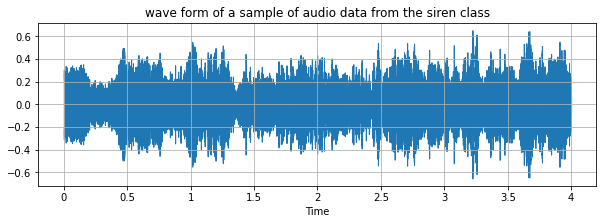

Audio data descriptive statistics
sample rate: 22050
min-value: -0.6464333534240723
max-value: 0.6545622944831848
std: 0.14187242090702057
mean: -1.5500003428314812e-05
median: -0.00023750039690639824
skew: 0.00016020523674370888
kurtosis: 0.30813682749099547

 

Statictics for MFCC extract
min-value: -138.77133178710938
max-value: 89.17631530761719
std: 30.133529663085938
mean: -3.04825496673584
median: -1.788912296295166
skew: -1.7653206198769995
kurtosis: 10.21306233500094
169466-4-3-10.wav 4


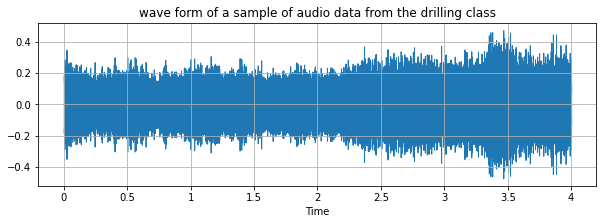

Audio data descriptive statistics
sample rate: 22050
min-value: -0.4604056179523468
max-value: 0.472781240940094
std: 0.08941895514726639
mean: -1.45631747727748e-05
median: -0.0004011833807453513
skew: 0.006067760585039511
kurtosis: 0.46219393207191883

 

Statictics for MFCC extract
min-value: -51.9938850402832
max-value: 41.67441940307617
std: 12.731001853942871
mean: 0.23000316321849823
median: 0.3059021830558777
skew: -0.8290426984600155
kurtosis: 7.57494977791394
31973-9-0-71.wav 9


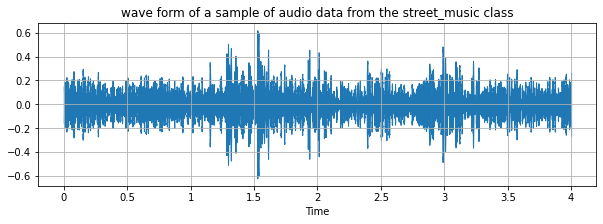

Audio data descriptive statistics
sample rate: 22050
min-value: -0.6019325852394104
max-value: 0.6224498748779297
std: 0.1166224256157875
mean: -0.0001560839737066999
median: -3.405773168196902e-05
skew: -0.08024040596382774
kurtosis: 1.5366887054259246

 

Statictics for MFCC extract
min-value: -222.54129028320312
max-value: 138.64797973632812
std: 42.16864776611328
mean: 2.5517756938934326
median: 3.338491439819336
skew: -2.952984804374062
kurtosis: 20.013369754190826
180029-4-13-0.wav 4


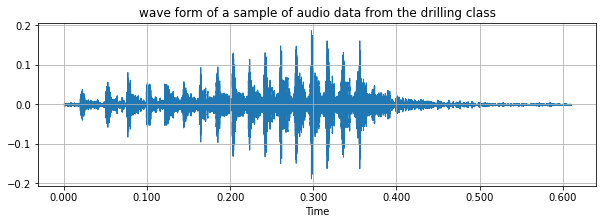

Audio data descriptive statistics
sample rate: 22050
min-value: -0.1753818839788437
max-value: 0.1874627023935318
std: 0.020618287846446037
mean: -1.4917867474650848e-06
median: -2.33314585784683e-05
skew: 0.0849907646466842
kurtosis: 9.497937950494045

 

Statictics for MFCC extract
min-value: -313.2221984863281
max-value: 82.67086791992188
std: 51.279197692871094
mean: -6.371092319488525
median: -0.34074142575263977
skew: -5.2160070512957395
kurtosis: 29.286205997583245
162103-0-0-0.wav 0


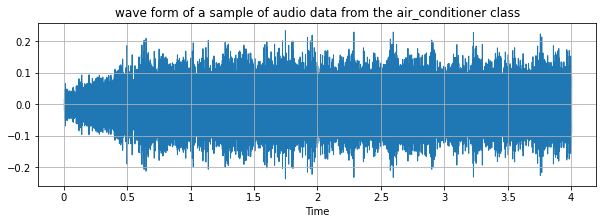

Audio data descriptive statistics
sample rate: 22050
min-value: -0.2291528433561325
max-value: 0.23494668304920197
std: 0.05311315506696701
mean: -7.308284239115892e-06
median: -9.614849113859236e-05
skew: 0.000554861109145681
kurtosis: 0.23128280147981162

 

Statictics for MFCC extract
min-value: -156.52566528320312
max-value: 143.93157958984375
std: 36.36408996582031
mean: -2.0939395427703857
median: -0.9433373808860779
skew: -0.4496115054715128
kurtosis: 11.95926089058855
50223-3-0-6.wav 3


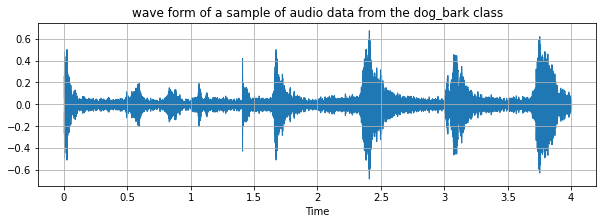

Audio data descriptive statistics
sample rate: 22050
min-value: -0.590811550617218
max-value: 0.6781206130981445
std: 0.06416857987642288
mean: -0.00011007406283169985
median: -0.00022552625159732997
skew: 0.10919576954024834
kurtosis: 13.455818013961117

 

Statictics for MFCC extract
min-value: -271.5353698730469
max-value: 200.83717346191406
std: 55.58979797363281
mean: -7.844954013824463
median: -1.9894559383392334
skew: -1.4556669445241217
kurtosis: 14.8034616362376
105289-8-0-1.wav 8


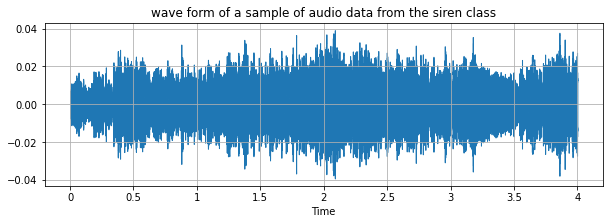

Audio data descriptive statistics
sample rate: 22050
min-value: -0.03913983330130577
max-value: 0.03749914839863777
std: 0.009146975353360176
mean: -0.00047269350034184754
median: -0.00046390443458221853
skew: -0.011015238006332499
kurtosis: 0.05490613208748396

 

Statictics for MFCC extract
min-value: -416.93310546875
max-value: 147.21722412109375
std: 70.00984954833984
mean: -7.1622490882873535
median: -2.5411758422851562
skew: -4.7369682687007515
kurtosis: 26.934994410641234


In [9]:
# trying out 10 random audio samples from random classes
for i in range(0,10):
      random_folder = f'fold{random.choice(range(1,10))}'
      random_file = random.choice(os.listdir(config.AUDIO_FILES_PATH +'/'+ random_folder))
      class_file = int(random_file.split('-')[1])
      audio_file = os.path.join(random_folder,random_file)

      print(random_file,class_file)

      #display frequency 
      plt.figure(figsize=(10,3))
      sample_audio = os.path.join(config.AUDIO_FILES_PATH, audio_file)
      audio_data, sample_rate = librosa.load(sample_audio)
      librosa.display.waveshow(audio_data,sample_rate)
      plt.title(f'wave form of a sample of audio data from the {audio_classes[class_file]} class')
      plt.grid(True)
      plt.show()

      # some descriptive stats on raw and normalised audio data 
      print(f'Audio data descriptive statistics')
      print(f'sample rate: {sample_rate}')
      print(f'min-value: {np.min(audio_data)}')
      print(f'max-value: {np.max(audio_data)}')
      print(f'std: {np.std(audio_data)}')
      print(f'mean: {np.mean(audio_data)}')
      print(f'median: {np.median(audio_data)}')
      print(f'skew: {skew(audio_data)}')
      print(f'kurtosis: {kurtosis(audio_data)}')


      print('\n \n')
      # Mel-Frequency extract stats
      mfcc = librosa.feature.mfcc(y=audio_data,
                              sr=sample_rate,
                              n_mfcc=config.N_DIMS)
      mfcc = np.mean(mfcc.T, axis=0) # normalize the MFCC values

      print(f'Statictics for MFCC extract')
      print(f'min-value: {np.min(mfcc)}')
      print(f'max-value: {np.max(mfcc)}')
      print(f'std: {np.std(mfcc)}')
      print(f'mean: {np.mean(mfcc)}')
      print(f'median: {np.median(mfcc)}')
      print(f'skew: {skew(mfcc)}')
      print(f'kurtosis: {kurtosis(mfcc)}')

      # play audio
      playsound(sample_audio)

In [10]:
# check frequency cepstrums of similar classes
# choosing the dog_bark class with a class ID of 3
dog_bark = df[df['class'] == 'dog_bark']
dog_bark = dog_bark[['slice_file_name','fold','classID']].sample(5)
dog_bark

,slice_file_name,fold,classID
3655,174994-3-0-0.wav,2,3
5523,208030-3-2-0.wav,6,3
1227,128891-3-0-5.wav,6,3
7625,73373-3-0-0.wav,3,3
8352,89211-3-0-0.wav,2,3


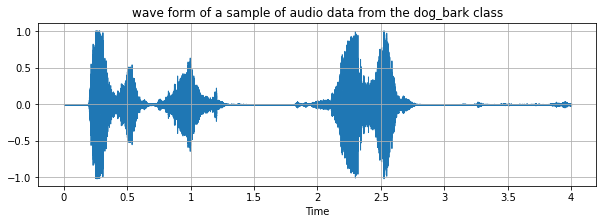

sample rate: 22050
min-value: -1.0185065269470215
max-value: 1.0131117105484009
std: 0.1255032867193222
mean: -6.787472375435755e-05
median: -2.327606125618331e-05
skew: -0.040931925904171905
kurtosis: 15.235364890037761

 

Statictics for MFCC extract
min-value: -315.4433288574219
max-value: 48.863677978515625
std: 50.69683074951172
mean: -7.098263740539551
median: -0.4014313220977783
skew: -5.590776826667513
kurtosis: 31.258207074067712


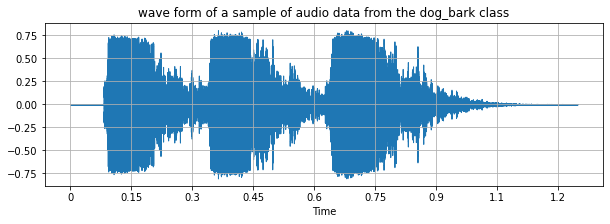

sample rate: 22050
min-value: -0.8053655624389648
max-value: 0.7894430160522461
std: 0.28485924005508423
mean: 4.2704723455244675e-05
median: 7.759586878819391e-06
skew: -0.021073871471071107
kurtosis: 1.5230223680895962

 

Statictics for MFCC extract
min-value: -170.59446716308594
max-value: 68.39925384521484
std: 33.603206634521484
mean: -6.644901275634766
median: -0.2478421926498413
skew: -3.2666301041985313
kurtosis: 13.684133427516912


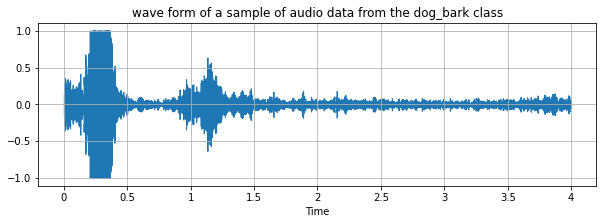

sample rate: 22050
min-value: -1.0072475671768188
max-value: 1.01010262966156
std: 0.15104269981384277
mean: -0.00010931943688774481
median: -0.0018372246995568275
skew: -0.010707852086850688
kurtosis: 20.97045980702515

 

Statictics for MFCC extract
min-value: -307.1558837890625
max-value: 127.65139770507812
std: 53.45051574707031
mean: -1.0933470726013184
median: 0.2485601007938385
skew: -4.319908036561039
kurtosis: 24.737979886871948


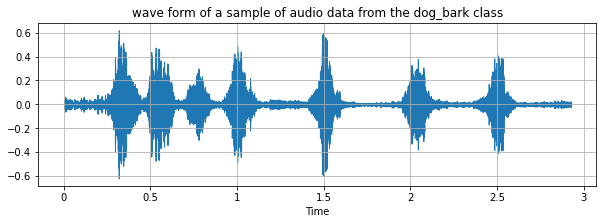

sample rate: 22050
min-value: -0.6231462955474854
max-value: 0.6015058159828186
std: 0.07645634561777115
mean: -3.913229193130974e-06
median: -0.0001948339049704373
skew: -0.019368589839254685
kurtosis: 10.23744879748865

 

Statictics for MFCC extract
min-value: -286.5202331542969
max-value: 165.0008087158203
std: 52.72163391113281
mean: -2.431753158569336
median: 1.2893266677856445
skew: -3.1159929205472237
kurtosis: 20.624688728407722


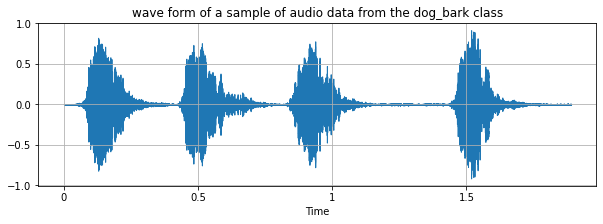

sample rate: 22050
min-value: -0.9171563386917114
max-value: 0.7935304641723633
std: 0.1535770744085312
mean: -0.00014331539568956941
median: -0.0004417219606693834
skew: -0.08063307249469735
kurtosis: 6.450692766517571

 

Statictics for MFCC extract
min-value: -272.7659606933594
max-value: 109.40040588378906
std: 47.01430892944336
mean: -4.089378833770752
median: 1.5794742107391357
skew: -4.314213917647658
kurtosis: 24.51955897956318


In [11]:
file_name = list(dog_bark.slice_file_name)
folder = list(dog_bark.fold)

for filename, fold in zip(file_name, folder):
      audio_file = os.path.join(f'fold{str(fold)}',filename)

      plt.figure(figsize=(10,3))
      sample_audio = os.path.join(config.AUDIO_FILES_PATH,audio_file)
      audio_data, sample_rate = librosa.load(sample_audio)
      librosa.display.waveshow(audio_data,sample_rate)
      plt.title(f'wave form of a sample of audio data from the {audio_classes[3]} class')
      plt.grid(True)
      plt.show()

      print(f'sample rate: {sample_rate}')
      print(f'min-value: {np.min(audio_data)}')
      print(f'max-value: {np.max(audio_data)}')
      print(f'std: {np.std(audio_data)}')
      print(f'mean: {np.mean(audio_data)}')
      print(f'median: {np.median(audio_data)}')
      print(f'skew: {skew(audio_data)}')
      print(f'kurtosis: {kurtosis(audio_data)}')

      print('\n \n')

      # Mel-Frequency extract stats
      mfcc = librosa.feature.mfcc(y=audio_data,
                              sr=sample_rate,
                              n_mfcc=config.N_DIMS)
      mfcc = np.mean(mfcc.T, axis=0) # normalize the MFCC values

      print(f'Statictics for MFCC extract')
      print(f'min-value: {np.min(mfcc)}')
      print(f'max-value: {np.max(mfcc)}')
      print(f'std: {np.std(mfcc)}')
      print(f'mean: {np.mean(mfcc)}')
      print(f'median: {np.median(mfcc)}')
      print(f'skew: {skew(mfcc)}')
      print(f'kurtosis: {kurtosis(mfcc)}')


      # play audio
      playsound(sample_audio)

In [12]:
# dataset from new audio folders location
folders_labels = []
audio_paths = []

dirs = os.listdir(config.SAVE_PATH)
for dir in dirs:
      audios = os.listdir(os.path.join(config.SAVE_PATH, dir))
      for audio in audios:
            audio_paths.append(os.path.join(config.SAVE_PATH, dir) + '/' + audio)
            folders_labels.append(dir)

In [13]:
audio_df = pd.DataFrame({'Audio-path':audio_paths, 'label':folders_labels})
audio_df

,Audio-path,label
0,dataset/car_horn/7389-1-1-0.wav,car_horn
1,dataset/car_horn/72259-1-9-5.wav,car_horn
2,dataset/car_horn/183894-1-8-0.wav,car_horn
3,dataset/car_horn/43802-1-1-0.wav,car_horn
4,dataset/car_horn/94868-1-0-0.wav,car_horn
...,...,...
8727,dataset/drilling/39532-4-1-0.wav,drilling
8728,dataset/drilling/151005-4-0-0.wav,drilling
8729,dataset/drilling/58005-4-0-32.wav,drilling
8730,dataset/drilling/77751-4-0-1.wav,drilling


In [14]:
min_value_lst = []
max_value_lst = []
std_lst = []
mean_lst = []
median_lst = []
skew_lst = []
kurtosis_lst = []

In [15]:
# extract features
feature_extract = []

audio_paths = list(audio_df['Audio-path'])
for audio, count in zip(audio_paths, range(len(audio_paths))):
      features = utils.extract_features(audio)
      feature_extract.append(features) 

      # MFCC Stats data 
      min_value_lst.append(np.min(features))
      max_value_lst.append(np.max(features))
      std_lst.append(np.std(features))
      mean_lst.append(np.mean(features))
      median_lst.append(np.median(features))
      skew_lst.append(skew(features))
      kurtosis_lst.append(kurtosis(features))

      print(f'done for audio {count}')



done for audio 0
done for audio 1
done for audio 2
done for audio 3
done for audio 4
done for audio 5
done for audio 6
done for audio 7
done for audio 8
done for audio 9
done for audio 10
done for audio 11
done for audio 12
done for audio 13
done for audio 14
done for audio 15
done for audio 16
done for audio 17
done for audio 18
done for audio 19
done for audio 20
done for audio 21
done for audio 22
done for audio 23
done for audio 24
done for audio 25
done for audio 26
done for audio 27
done for audio 28
done for audio 29
done for audio 30
done for audio 31
done for audio 32
done for audio 33
done for audio 34
done for audio 35
done for audio 36
done for audio 37
done for audio 38
done for audio 39
done for audio 40
done for audio 41
done for audio 42
done for audio 43
done for audio 44
done for audio 45
done for audio 46
done for audio 47
done for audio 48
done for audio 49
done for audio 50
done for audio 51
done for audio 52
done for audio 53
done for audio 54
done for audio 55
do

In [16]:
print(len(feature_extract))

# dataf = pd.DataFrame({'feature_extract':feature_extract})
# dataf
audio_df['MFCC-features'] = feature_extract
display(audio_df.head(5))

audio_df.to_csv(config.EXTRACTED_FEATURE_SAVE_PATH)

8732


,Audio-path,label,MFCC-features
0,dataset/car_horn/7389-1-1-0.wav,car_horn,"[-121.55058, 65.45534, -32.427902, 34.492073, ..."
1,dataset/car_horn/72259-1-9-5.wav,car_horn,"[-126.84716, 115.87754, -55.64741, 42.58142, -..."
2,dataset/car_horn/183894-1-8-0.wav,car_horn,"[-252.9698, 167.19125, -39.19234, 4.9301143, -..."
3,dataset/car_horn/43802-1-1-0.wav,car_horn,"[-132.8113, 55.07116, -1.1111865, 34.076862, 2..."
4,dataset/car_horn/94868-1-0-0.wav,car_horn,"[-264.63226, -33.122623, -17.734629, 40.243603..."


In [17]:
X = np.array(audio_df['MFCC-features'].tolist())
y = np.array(audio_df['label'].tolist())

In [18]:
# save data
with open(config.PICKLE_SAVE_PATHS + 'Xvalues', 'wb') as f:
      pkl.dump(X, f)
with open(config.PICKLE_SAVE_PATHS + 'yvalues', 'wb') as f:
      pkl.dump(y, f)

In [19]:
mfcc_data = pd.DataFrame({'min_value':min_value_lst, 'max_value':max_value_lst, 'std':std_lst,
                         'mean':mean_lst, 'median':median_lst, 'skew':skew_lst, 'kurtosis':kurtosis_lst})

mfcc_data = mfcc_data.assign(labels=audio_df['label'])
mfcc_data

,min_value,max_value,std,mean,median,skew,kurtosis,labels
0,-121.550583,65.455338,24.580328,-2.251909,-0.704169,-2.281909,12.540225,car_horn
1,-126.847160,115.877541,31.312759,-0.769311,0.445877,-0.430298,8.797351,car_horn
2,-252.969803,167.191254,48.798847,-2.647705,0.021331,-2.326509,17.988012,car_horn
3,-132.811295,55.071159,26.491137,1.429906,2.026098,-2.966784,14.084645,car_horn
4,-264.632263,40.243603,45.578289,-8.555743,-3.226343,-4.335254,22.043105,car_horn
...,...,...,...,...,...,...,...,...
8727,-122.167442,27.085032,26.897406,-4.094758,3.500185,-2.720750,8.080559,drilling
8728,-133.940567,35.603207,24.261259,-3.582786,0.624641,-3.836582,18.226357,drilling
8729,-64.242607,43.882713,15.808039,-1.686942,-1.641500,-0.835131,5.579684,drilling
8730,-178.893692,154.043915,38.440590,-1.373351,-2.573030,-0.785039,15.074829,drilling


In [20]:
mfcc_data.to_csv(config.EXTRACTED_MFCC_FEATURE_SAVE_PATH)